<a href="https://colab.research.google.com/github/jecampagne/cours_mallat_cdf/blob/main/cours2022/image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.style.use('seaborn-white')
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 18

from PIL import Image
import PIL
from io import BytesIO


#Compression d'images JPEG et JPEG2000

18 Mars 22: il y a un probleme tant en JPEG ou en JPEG2000 avec tous les utilitaires Liunx ImageMagick/cjpeg et ou PIL : la PSNR en fonction du nombre de bits par pixel (R) ne suit pas la pente theorique pour R>1. Il y a un manque de qualité.


In [32]:
!wget https://pns2019.github.io/images/Lenna.png

--2023-02-20 15:53:41--  https://pns2019.github.io/images/Lenna.png
Resolving pns2019.github.io (pns2019.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to pns2019.github.io (pns2019.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna.png’

Lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.04s   

2023-02-20 15:53:41 (12.3 MB/s) - ‘Lenna.png’ saved [473831/473831]



In [35]:
imgOrig = Image.open("Lenna.png").convert('L')

In [36]:
imgOrig_arr = np.array(imgOrig)*1.


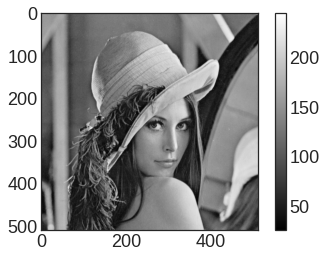

In [37]:
plt.imshow(imgOrig_arr, interpolation=None, cmap='gray')
plt.colorbar()


In [39]:
compress_type="JPEG2000"   # ou "JPEG" ou "JPEG2000"


In [40]:
bppAll = []
PSNRAll = []
qJPEG = [3, 4, 5, 6, 7, 8, 10, 15, 20, 25, 30, 40, 50, 60, 70, 75, 80, 85, 90, 92, 93, 95, 96, 97]
qJPEG2000 = [20, 21, 22, 23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,45,50]
q_fact = qJPEG if compress_type == "JPEG" else qJPEG2000

for q in q_fact:
    with BytesIO() as f:
        if compress_type == "JPEG":
            imgOrig.save(f, format='JPEG', quality=q, optimize=True)
        else:
            imgOrig.save(f, format='JPEG2000', quality_mode='dB', quality_layers=[q])
        img_file_size_jpeg = f.getbuffer().nbytes
        bpp=img_file_size_jpeg * 8./512**2
        f.seek(0)
        ima_jpg = Image.open(f)
        ima_jpg.load()
        ima_jpg = np.array(ima_jpg)*1.

    
    MSE = np.sum((imgOrig_arr-ima_jpg)**2)/512**2
    PSNR = 10*np.log10(255**2/MSE)
    bppAll.append(bpp)
    PSNRAll.append(PSNR)

In [41]:
xval = np.linspace(0,3.5,10)
pval = 20*np.log10(2)*(xval-1)+40.


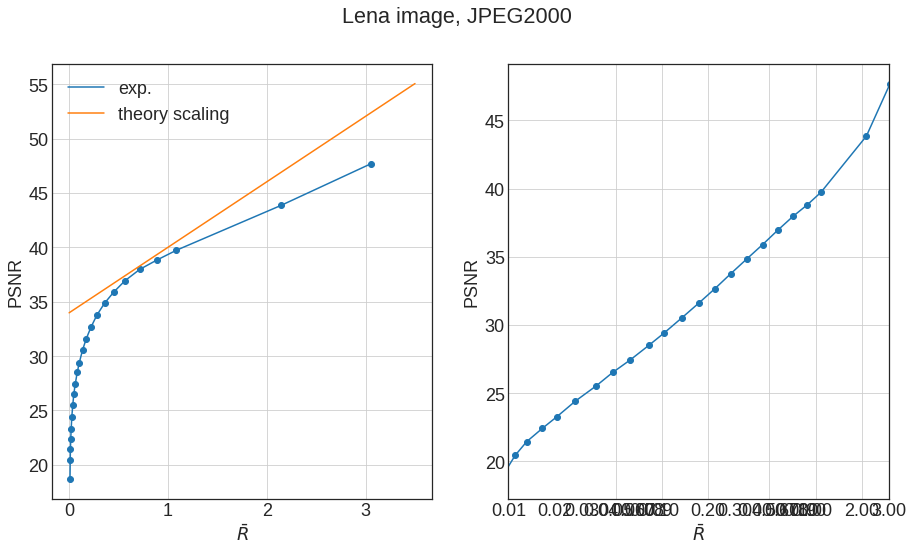

In [44]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(bppAll,PSNRAll, label="exp.")
ax[0].scatter(bppAll,PSNRAll)
ax[0].plot(xval,pval, label="theory scaling")
ax[0].set_xlabel(r"$\bar{R}$")
ax[0].set_ylabel("PSNR")
ax[0].grid()
ax[0].legend();

ax[1].plot(bppAll,PSNRAll)
ax[1].scatter(bppAll,PSNRAll)
ax[1].set_xscale("log")
ax[1].set_xticks(np.arange(1/8, 1, 1/2**3))
ax[1].set_xlabel(r"$\bar{R}$")
ax[1].set_ylabel("PSNR")
ax[1].set_xlim([0.01,1.0])
ax[1].grid()
ax[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
ax[1].xaxis.set_minor_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
ax[1].set_xticks([0.01,0.05,0.1,0.2,0.5,1.0,2.0, 3.0])
fig.suptitle(f"Lena image, {compress_type}");